# Can you predict which NBA players will make the "All-Star" team?

## Part one: Clean the data

#### Import libraries

In [650]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

#### Load 'player_data.csv' 

In [635]:
player_df = pd.read_csv('player_data.csv')
player_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,...,NaN,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Drop the first column

In [636]:
player_df.drop(columns=[player_df.columns[0]], inplace=True)
player_df

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,0.368,NaN,NaN,...,NaN,0.279,0.279,0.705,NaN,176.0,NaN,NaN,NaN,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,0.435,NaN,NaN,...,NaN,0.372,0.372,0.708,NaN,109.0,NaN,NaN,NaN,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,0.394,NaN,NaN,...,NaN,0.349,0.349,0.698,NaN,140.0,NaN,NaN,NaN,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,0.312,NaN,NaN,...,NaN,0.256,0.256,0.559,NaN,20.0,NaN,NaN,NaN,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,0.308,NaN,NaN,...,NaN,0.256,0.256,0.548,NaN,20.0,NaN,NaN,NaN,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,NaN,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Remove null values from "Players" column

In [637]:
print(player_df.isna().sum())
player_df.dropna(subset=['Player'], inplace=True)
print(player_df.isna().sum())

Year        67
Player      67
Pos         67
Age         75
Tm          67
G           67
PER        590
TS%        153
ORB%      3899
DRB%      3899
TRB%      3120
AST%      2136
STL%      3899
BLK%      3899
TOV%      5109
WS         106
BPM       3894
VORP      3894
FG%        166
3P%       9275
2P%        195
eFG%       166
FT%        925
TRB        379
AST         67
STL       3894
BLK       3894
TOV       5046
PTS         67
dtype: int64
Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
PER        523
TS%         86
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
WS          39
BPM       3827
VORP      3827
FG%         99
3P%       9208
2P%        128
eFG%        99
FT%        858
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PTS          0
dtype: int64


#### Replace null values with 0's in the '3P%' column

In [638]:
player_df.fillna({'3P%':0}, inplace=True)
print(player_df.isna().sum())

Year         0
Player       0
Pos          0
Age          8
Tm           0
G            0
PER        523
TS%         86
ORB%      3832
DRB%      3832
TRB%      3053
AST%      2069
STL%      3832
BLK%      3832
TOV%      5042
WS          39
BPM       3827
VORP      3827
FG%         99
3P%          0
2P%        128
eFG%        99
FT%        858
TRB        312
AST          0
STL       3827
BLK       3827
TOV       4979
PTS          0
dtype: int64


#### Remove rows for players who started their careers before the 1980 season

In [639]:
# player_df = player_df[player_df.Year <= 1980]
player_df = player_df[~player_df['Player'].isin(player_df[player_df.Year < 1980].Player)] 
player_df

,Year,Player,Pos,Age,Tm,G,PER,TS%,ORB%,DRB%,...,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PTS
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,12.3,0.495,10.2,18.3,...,0.000,0.450,0.450,0.673,197.0,28.0,21.0,54.0,79.0,312.0
5741,1980.0,Billy Ray,SG,23.0,POR,16.0,24.1,0.552,6.0,7.6,...,0.421,0.504,0.521,0.718,29.0,31.0,14.0,2.0,20.0,180.0
5748,1980.0,Larry Bird*,PF,23.0,BOS,82.0,20.5,0.538,8.3,23.6,...,0.406,0.481,0.494,0.836,852.0,370.0,143.0,53.0,263.0,1745.0
5753,1980.0,Lawrence Boston,PF,23.0,WSB,13.0,12.6,0.485,15.1,16.2,...,0.000,0.462,0.462,0.615,39.0,2.0,4.0,2.0,8.0,56.0
5759,1980.0,Dudley Bradley,SG,22.0,IND,82.0,13.5,0.502,3.4,8.1,...,0.400,0.452,0.453,0.782,223.0,252.0,211.0,48.0,166.0,688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,16.7,0.604,8.6,17.3,...,0.000,0.572,0.571,0.679,405.0,99.0,62.0,58.0,65.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,13.0,0.508,9.2,17.0,...,0.000,0.497,0.494,0.564,124.0,42.0,7.0,21.0,20.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,7.3,0.346,10.8,24.9,...,0.000,0.323,0.323,0.600,35.0,4.0,2.0,5.0,3.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,6.9,0.503,1.9,14.2,...,0.333,0.451,0.473,0.775,125.0,36.0,15.0,16.0,40.0,240.0


#### Load in the 'all_star_appearances.pickle' file and use this data to create a column called 'all_star' that indicates whether or not a player made the All-Star team for a given year
- This file is a dictionary in which the keys are players who've made an All-Star team in their careers
- The values are all the years that the corresponding player made an All-Star team

#### Make sure this column is binary where 1 = Made All-Star team, and 0 = Did not make All-Star team

In [640]:
allstar_dict = pd.read_pickle('all_star_appearances.pickle')
allstar_dict

defaultdict(set,
            {'Julius Erving': {1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987},
             'Jack Sikma': {1980, 1981, 1982, 1983, 1984, 1985},
             'Dan Roundfield': {1980, 1981, 1982},
             'Dennis Johnson': {1980, 1981, 1982, 1985},
             'Tiny Archibald': {1980, 1981, 1982},
             'Kareem Abdul-Jabbar': {1980,
              1981,
              1982,
              1983,
              1984,
              1985,
              1986,
              1987,
              1988,
              1989},
             'Eddie Johnson': {1980, 1981},
             'Otis Birdsong': {1980, 1981, 1984},
             'Magic Johnson': {1980,
              1982,
              1983,
              1984,
              1985,
              1986,
              1987,
              1988,
              1989,
              1990,
              1991,
              1992},
             'Kermit Washington': {1980},
             'Bill Cartwright': {1980},
             'John Dr

In [641]:
player_df['all_star'] = 0
for k, v in allstar_dict.items():
#     print(k, list(v))
    player_df.loc[(player_df.Player==k) & (player_df.Year.isin(v)), ['all_star']] = 1

C:\Users\somes\AppData\Local\Temp/ipykernel_6620/911938586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['all_star'] = 0
C:\Users\somes\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [642]:
player_df[player_df['all_star']==1].shape[0]

555

## Part 2: Exploratory data analysis

#### Generate descriptive stats for the features

#### Create a corr map of the features

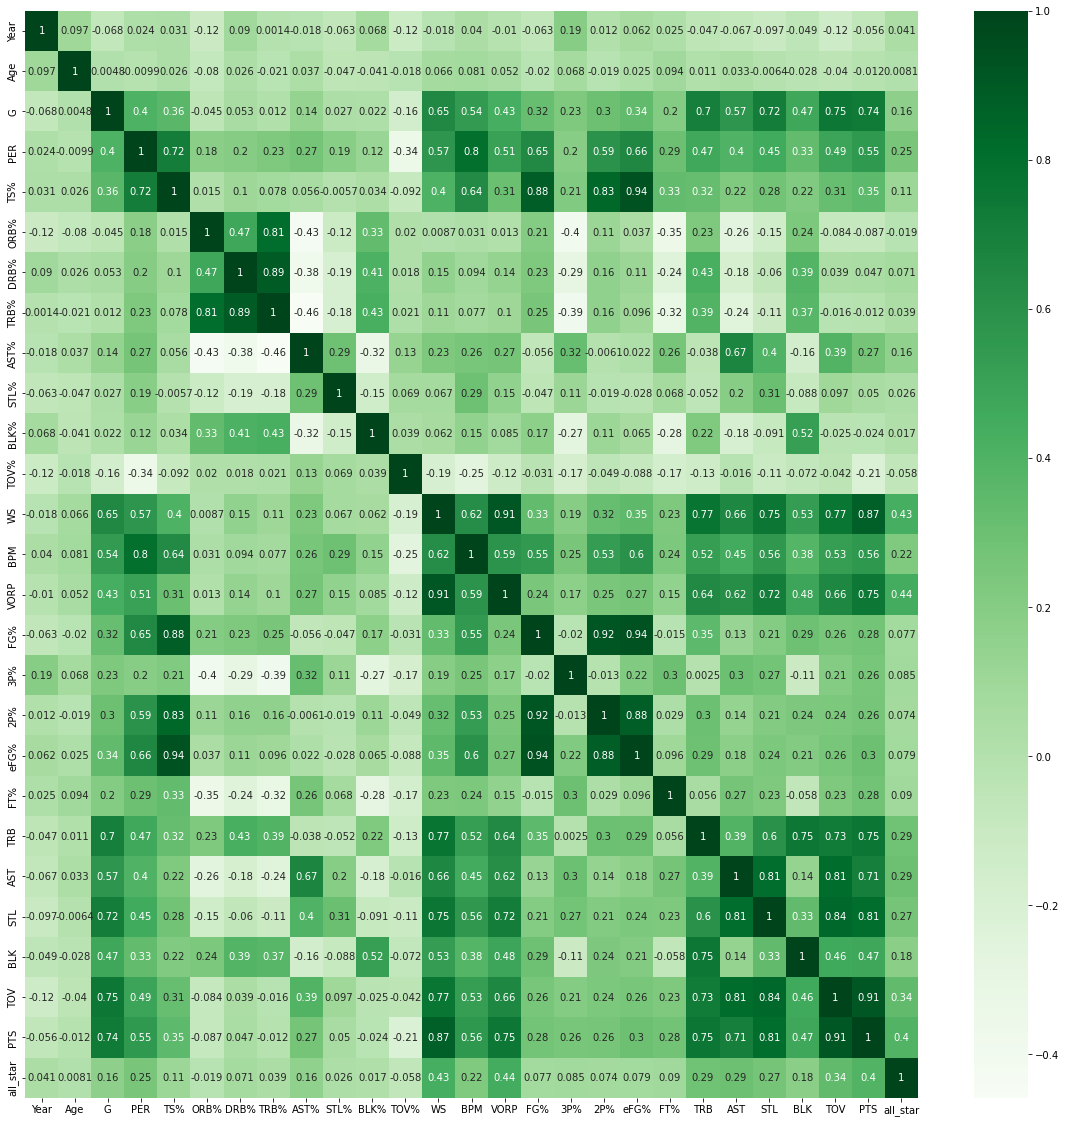

In [643]:
corr = player_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

#### Graph the distibution of the 'Age' feature

<AxesSubplot:ylabel='Frequency'>

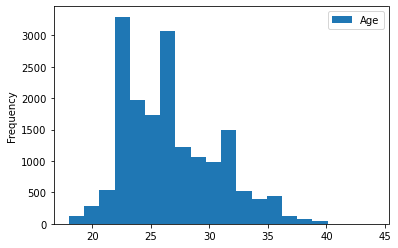

In [644]:
player_df[['Age']].plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

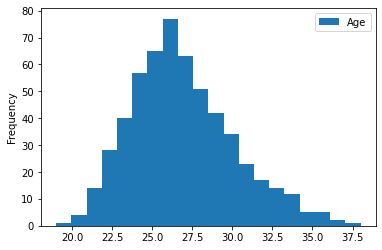

In [645]:
player_df.loc[player_df['all_star']==1 ,['Age']].plot.hist(bins=20)

## Part 3: Classification

### Build a classifier that predicts whether or not a player makes an All-Star team based on their stats for that season

### FINDINGS:
- Best combination in pipeline found was - StandardScale, PCA, classification model

**RESULTS**

                 Model                                   Test Accuracy(score), AUC score, F1 score(macro avg)
- Histogram-based Gradient Boosting Classification Tree-> 99.48%, 0.98, 0.77 (best)
- Gradient Boosting for classification---------------------------> 96.41%, 0.97, 0.73
- Support Vector Machine-----------------------------------------> 97.28%, 0.98, 0.74
- Stochastic Gradient Descent Regressor---------------------> 97.28%, 0.98, 0.74
- Multi-layer Perceptron, neural net-----------------------------> 99.48%, 0.98, 0.74

In [646]:
# remove null values from PER column as classification algorithms(except HistGradientBoosting) requiress non-null value columns
player_df.dropna(subset=['PER'], inplace=True)
player_df[columns].isna().sum()

C:\Users\somes\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Year    0
Age     0
G       0
PER     0
ORB%    0
DRB%    0
TRB%    0
AST%    0
STL%    0
BLK%    0
WS      0
BPM     0
VORP    0
3P%     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PTS     0
dtype: int64

In [647]:
# columns having good correlation with all_star column (except columns 'Age')
# 'Age' column distribution shows, player in their prime age are probably more be selected in All-star
columns = ['Age', 'G', 'PER', 'WS', 'BPM', 'VORP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']

In [648]:
# All numerical and non-null columns -> took as PCA will reduce the features space
columns = ['Year', 'Age', 'G', 'PER', 'ORB%', 'DRB%',
       'TRB%', 'AST%', 'STL%', 'BLK%', 'WS', 'BPM', 'VORP',
       '3P%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']
# columns = ['3P%', 'WS', 'BPM', 'VORP', 'STL%']
player_df[columns].isna().sum()

Year    0
Age     0
G       0
PER     0
ORB%    0
DRB%    0
TRB%    0
AST%    0
STL%    0
BLK%    0
WS      0
BPM     0
VORP    0
3P%     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PTS     0
dtype: int64

In [649]:
# class imbalance
player_df.all_star.value_counts()

0    16848
1      555
Name: all_star, dtype: int64

In [585]:
# columns having good correlation with all_star column (except columns 'Age')
# 'Age' column distribution shows, player in their prime age are probably more be selected in All-star
columns = ['Age', 'G', 'PER', 'WS', 'BPM', 'VORP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS']
player_df[columns].isna().sum()

Age     0
G       0
PER     0
WS      0
BPM     0
VORP    0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PTS     0
dtype: int64

In [617]:
X_train, X_test, y_train, y_test = train_test_split(player_df[columns], player_df['all_star'],
                                                   stratify=player_df.all_star)
# X_train, X_test, y_train, y_test = train_test_split(player_df[player_df.describe().columns], player_df['all_star'], 
#                                                     stratify=player_df.all_star)

In [618]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13052, 20), (4351, 20), (13052,), (4351,))

In [619]:
# handle class imbalance
# SVMSMote uses SVM classifier to find support vectors and generate samples considering them

# "got less accuracy(max 94%) after Over-sampling so removed it"
# uncomment below lines of code to do over-sampling

from imblearn.over_sampling import SVMSMOTE 
sm = SVMSMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_train.shape, y_train.shape

((25272, 20), (25272,))

In [620]:
y_train.value_counts()

0    12636
1    12636
Name: all_star, dtype: int64

In [621]:
# classification using gradient boosting

rfe_pipe = make_pipeline(StandardScaler(), PCA(),
                        GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))

rfe_pipe.fit(X_train, y_train)
rfe_pipe.score(X_train, y_train)

0.9641896169673947

C:\Users\somes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


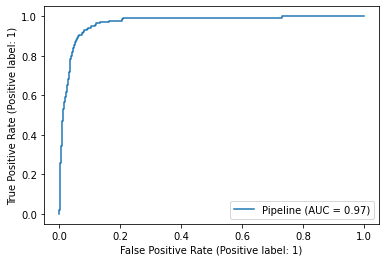

In [622]:
metrics.plot_roc_curve(rfe_pipe, X_test, y_test)

In [623]:
print(metrics.classification_report(y_test, rfe_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4212
           1       0.34      0.88      0.49       139

    accuracy                           0.94      4351
   macro avg       0.67      0.91      0.73      4351
weighted avg       0.97      0.94      0.95      4351



In [624]:
# classification using Hist gradient boosting (best method)

rfe_pipe2 = make_pipeline(StandardScaler(), PCA(),
                       HistGradientBoostingClassifier())

rfe_pipe2.fit(X_train, y_train)
rfe_pipe2.score(X_train, y_train)

0.9948163975941754

C:\Users\somes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


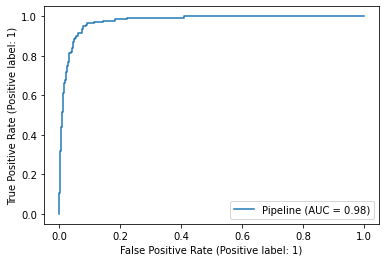

In [625]:
metrics.plot_roc_curve(rfe_pipe2, X_test, y_test)

In [626]:
print(metrics.classification_report(y_test, rfe_pipe2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4212
           1       0.43      0.81      0.57       139

    accuracy                           0.96      4351
   macro avg       0.71      0.89      0.77      4351
weighted avg       0.98      0.96      0.97      4351



In [627]:
# classification use SVM

rfe_pipe3 = make_pipeline(StandardScaler(), PCA(),
                        svm.SVC(class_weight='balanced'))

rfe_pipe3.fit(X_train, y_train)
rfe_pipe3.score(X_train, y_train)

0.972894903450459

C:\Users\somes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


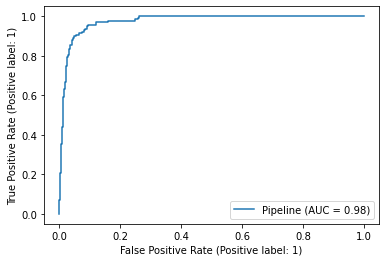

In [628]:
metrics.plot_roc_curve(rfe_pipe3, X_test, y_test)

In [629]:
print(metrics.classification_report(y_test, rfe_pipe3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4212
           1       0.36      0.91      0.51       139

    accuracy                           0.95      4351
   macro avg       0.68      0.93      0.74      4351
weighted avg       0.98      0.95      0.96      4351



In [630]:
# Neural networks classifier

# clf4 = MLPClassifier(learning_rate='adaptive', verbose=True)

rfe_pipe4 = make_pipeline(StandardScaler(), PCA(),
                        MLPClassifier(learning_rate='adaptive', verbose=True))

rfe_pipe4.fit(X_train, y_train)
rfe_pipe4.score(X_train, y_train)

Iteration 1, loss = 0.26728313
Iteration 2, loss = 0.14674538
Iteration 3, loss = 0.13247703
Iteration 4, loss = 0.12424287
Iteration 5, loss = 0.11731309
Iteration 6, loss = 0.11190290
Iteration 7, loss = 0.10765920
Iteration 8, loss = 0.10412787
Iteration 9, loss = 0.10107388
Iteration 10, loss = 0.09845771
Iteration 11, loss = 0.09595794
Iteration 12, loss = 0.09441763
Iteration 13, loss = 0.09234136
Iteration 14, loss = 0.09099413
Iteration 15, loss = 0.08915750
Iteration 16, loss = 0.08805502
Iteration 17, loss = 0.08671545
Iteration 18, loss = 0.08531898
Iteration 19, loss = 0.08410757
Iteration 20, loss = 0.08274706
Iteration 21, loss = 0.08186703
Iteration 22, loss = 0.08039772
Iteration 23, loss = 0.07949384
Iteration 24, loss = 0.07830875
Iteration 25, loss = 0.07718884
Iteration 26, loss = 0.07659476
Iteration 27, loss = 0.07581097
Iteration 28, loss = 0.07435950
Iteration 29, loss = 0.07372600
Iteration 30, loss = 0.07286339
Iteration 31, loss = 0.07198830
Iteration 32, los

C:\Users\somes\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9948955365622032

C:\Users\somes\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


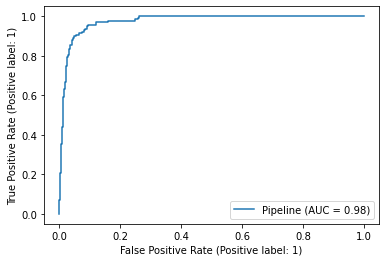

In [631]:
metrics.plot_roc_curve(rfe_pipe3, X_test, y_test)

In [632]:
print(metrics.classification_report(y_test, rfe_pipe3.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4212
           1       0.36      0.91      0.51       139

    accuracy                           0.95      4351
   macro avg       0.68      0.93      0.74      4351
weighted avg       0.98      0.95      0.96      4351

